In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#basic lib
import pandas as pd
import numpy as np

#visual lib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

#model lib
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score,
                             confusion_matrix,precision_score, recall_score,
                             roc_auc_score, classification_report, roc_curve,auc)

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [ ]:
#Load dataset
data = pd.read_csv("/content/drive/MyDrive/Data Mining/wind_dataset.csv")
# data = pd.read_csv("/content/wind_dataset.csv")
# Display the first few rows of the dataset
print(data.head())

         DATE   WIND  IND  RAIN  IND.1  T.MAX  IND.2  T.MIN  T.MIN.G
0  1961-01-01  13.67    0   0.2    0.0    9.5    0.0    3.7     -1.0
1  1961-01-02  11.50    0   5.1    0.0    7.2    0.0    4.2      1.1
2  1961-01-03  11.25    0   0.4    0.0    5.5    0.0    0.5     -0.5
3  1961-01-04   8.63    0   0.2    0.0    5.6    0.0    0.4     -3.2
4  1961-01-05  11.92    0  10.4    0.0    7.2    1.0   -1.5     -7.5


#Cleaning and repair data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [ ]:
data.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [ ]:
data.shape

(6574, 9)

In [ ]:
#Handle Missing Data
data.isnull().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [ ]:
# Replace null values to mean value
data['IND.1'].fillna(data['IND.1'].mean(), inplace=True)
data['T.MAX'].fillna(data['T.MAX'].mean(), inplace=True)
data['IND.2'].fillna(data['IND.2'].mean(), inplace=True)
data['T.MIN'].fillna(data['T.MIN'].mean(), inplace=True)
data['T.MIN.G'].fillna(data['T.MIN.G'].mean(), inplace=True)
data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [ ]:
#Remove Duplicates
data.drop_duplicates(inplace=True)

In [ ]:
data.nunique()

DATE       6574
WIND        580
IND           3
RAIN        226
IND.1         5
T.MAX       247
IND.2         6
T.MIN       248
T.MIN.G     284
dtype: int64

In [ ]:
#Fix "DATE" Column , Convert it to DateTime data type
data['DATE'] =pd.to_datetime(data['DATE'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6574 non-null   float64       
 5   T.MAX    6574 non-null   float64       
 6   IND.2    6574 non-null   float64       
 7   T.MIN    6574 non-null   float64       
 8   T.MIN.G  6574 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


In [ ]:
#Handle Outliers
Q1 = data['WIND'].quantile(0.25)
Q3 = data['WIND'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['WIND'] < (Q1 - 1.5 * IQR)) | (data['WIND'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Normalize or Standardize Data
scaler = StandardScaler()
data[['T.MAX', 'T.MIN', 'T.MIN.G', 'RAIN', 'IND', 'IND.1', 'IND.2']] = scaler.fit_transform(data[['T.MAX', 'T.MIN', 'T.MIN.G', 'RAIN', 'IND', 'IND.1', 'IND.2']])

<ipython-input-13-210e6d757131>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['T.MAX', 'T.MIN', 'T.MIN.G', 'RAIN', 'IND', 'IND.1', 'IND.2']] = scaler.fit_transform(data[['T.MAX', 'T.MIN', 'T.MIN.G', 'RAIN', 'IND', 'IND.1', 'IND.2']])


In [ ]:
#Convert Categorical Variables
data['Year'] = pd.to_datetime(data['DATE']).dt.year
data['Month'] = pd.to_datetime(data['DATE']).dt.month
print(data)

           DATE   WIND       IND      RAIN     IND.1     T.MAX     IND.2  \
0    1961-01-01  13.67 -0.332825 -0.419534 -0.315833 -0.833820 -0.395167   
1    1961-01-02  11.50 -0.332825  0.817404 -0.315833 -1.328727 -0.395167   
2    1961-01-03  11.25 -0.332825 -0.369046 -0.315833 -1.694528 -0.395167   
3    1961-01-04   8.63 -0.332825 -0.419534 -0.315833 -1.673010 -0.395167   
4    1961-01-05  11.92 -0.332825  2.155315 -0.315833 -1.328727  0.460408   
...         ...    ...       ...       ...       ...       ...       ...   
6569 1978-12-27  14.46 -0.332825  3.770907 -0.315833 -0.769267 -0.395167   
6570 1978-12-28  14.33 -0.332825  3.568958 -0.315833 -0.919890 -0.395167   
6571 1978-12-29  19.17 -0.332825  3.240791 -0.315833 -1.802116 -0.395167   
6572 1978-12-30  18.08 -0.332825  0.766916 -0.315833 -2.253988 -0.395167   
6573 1978-12-31  19.25 -0.332825 -0.343803 -0.315833 -2.619789  0.460408   

         T.MIN   T.MIN.G  Year  Month  
0    -0.621238 -0.690344  1961      1  
1    -0

In [ ]:
data['Year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978], dtype=int32)

In [ ]:
data = data.drop(columns=["Year"])

In [ ]:
# Check for any remaining NaN values
print(data.isnull().sum().sum())  # Should be 0 if there are no NaN values

0


<ipython-input-18-c09098482bfe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='WIND', data=data, palette='Set3')


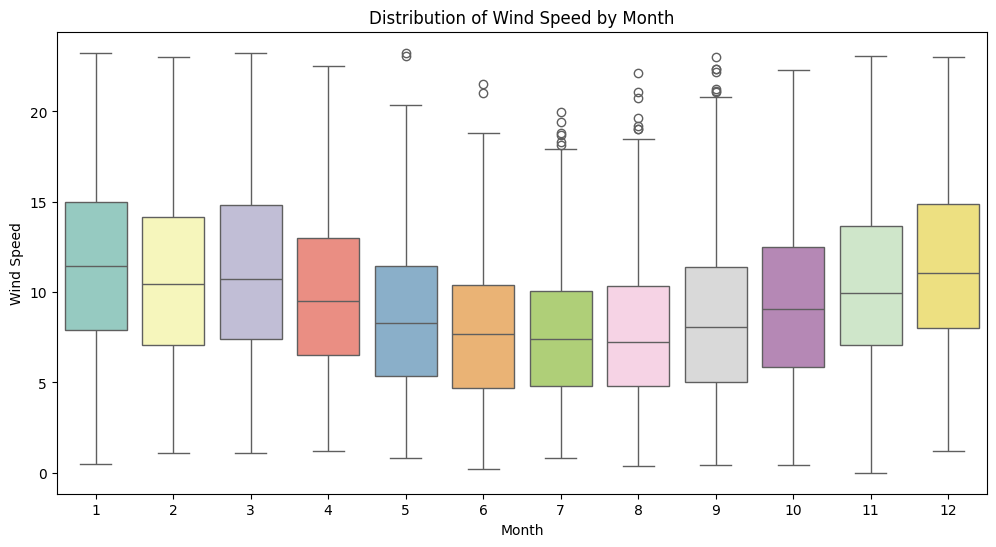

<ipython-input-18-c09098482bfe>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='RAIN', data=data, palette='Set3')


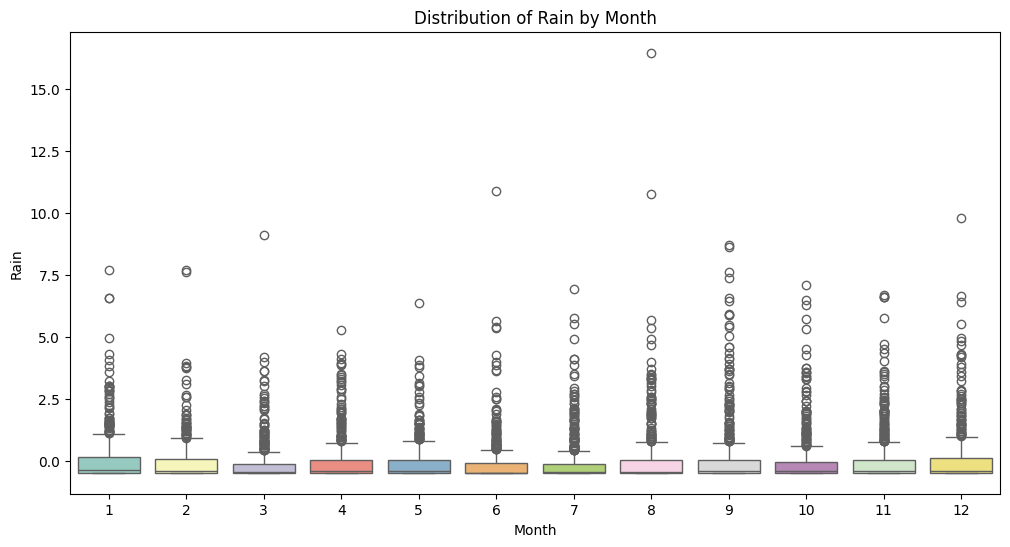

<ipython-input-18-c09098482bfe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='WIND', data=season_wind_avg, palette='Set3')


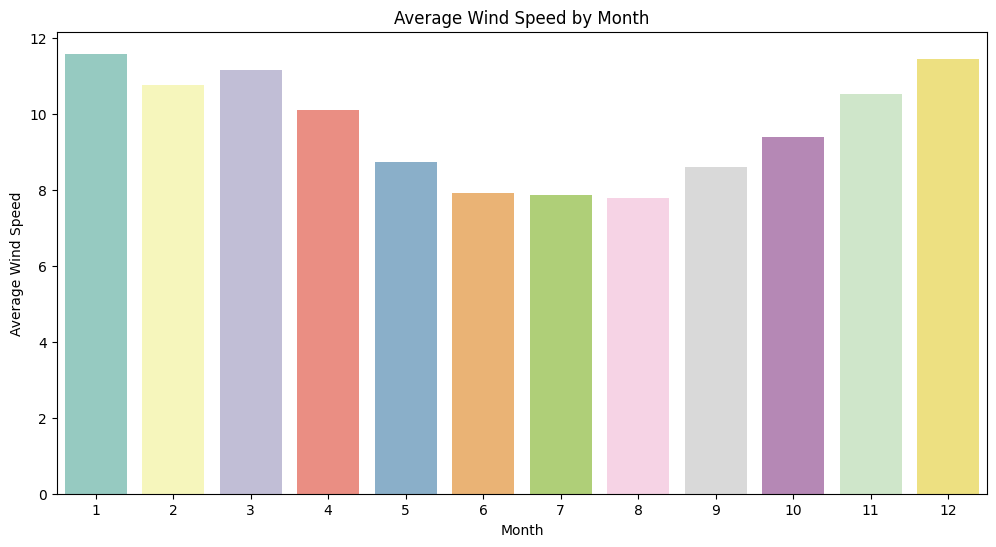

<ipython-input-18-c09098482bfe>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='RAIN', data=season_rain_avg, palette='Set3')


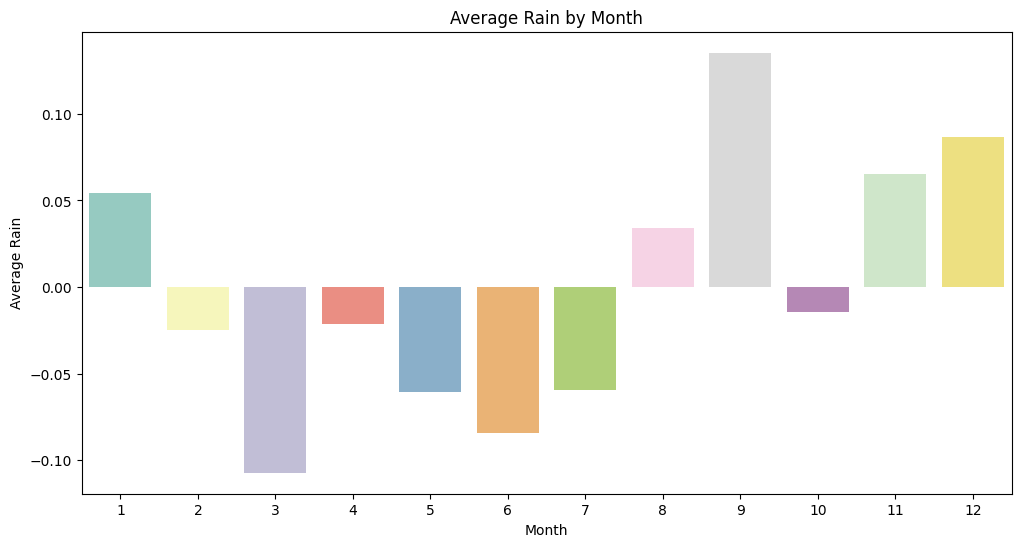

In [ ]:
# Visualization for Wind and Rain distribution across Month

# Box plot for Wind by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='WIND', data=data, palette='Set3')
plt.title('Distribution of Wind Speed by Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.show()

# Box plot for Rain by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='RAIN', data=data, palette='Set3')
plt.title('Distribution of Rain by Month')
plt.xlabel('Month')
plt.ylabel('Rain')
plt.show()

# Bar plot for Average Wind by Month
plt.figure(figsize=(12, 6))
season_wind_avg = data.groupby('Month')['WIND'].mean().reset_index()
sns.barplot(x='Month', y='WIND', data=season_wind_avg, palette='Set3')
plt.title('Average Wind Speed by Month')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed')
plt.show()

# Bar plot for Average Rain by Month
plt.figure(figsize=(12, 6))
season_rain_avg = data.groupby('Month')['RAIN'].mean().reset_index()
sns.barplot(x='Month', y='RAIN', data=season_rain_avg, palette='Set3')
plt.title('Average Rain by Month')
plt.xlabel('Month')
plt.ylabel('Average Rain')
plt.show()

In [ ]:
# Function to determine the season based on the Month
def get_season(Month):
    if Month in [12, 1, 2]:
        return 'Winter'
    elif Month in [3, 4, 5]:
        return 'Spring'
    elif Month in [6, 7, 8]:
        return 'Summer'
    elif Month in [9, 10, 11]:
        return 'Autumn'

# Create a 'season' column based on the 'Month' column
data['season'] = data['Month'].apply(get_season)
# # Apply Label Encoding to the 'season' column
# label_encoder = LabelEncoder()
# data['season'] = label_encoder.fit_transform(data['season'])

print(data.head())
data.info()

        DATE   WIND       IND      RAIN     IND.1     T.MAX     IND.2  \
0 1961-01-01  13.67 -0.332825 -0.419534 -0.315833 -0.833820 -0.395167   
1 1961-01-02  11.50 -0.332825  0.817404 -0.315833 -1.328727 -0.395167   
2 1961-01-03  11.25 -0.332825 -0.369046 -0.315833 -1.694528 -0.395167   
3 1961-01-04   8.63 -0.332825 -0.419534 -0.315833 -1.673010 -0.395167   
4 1961-01-05  11.92 -0.332825  2.155315 -0.315833 -1.328727  0.460408   

      T.MIN   T.MIN.G  Month  season  
0 -0.621238 -0.690344      1  Winter  
1 -0.507512 -0.303313      1  Winter  
2 -1.349086 -0.598194      1  Winter  
3 -1.371831 -1.095805      1  Winter  
4 -1.803990 -1.888297      1  Winter  
<class 'pandas.core.frame.DataFrame'>
Index: 6508 entries, 0 to 6573
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6508 non-null   datetime64[ns]
 1   WIND     6508 non-null   float64       
 2   IND      6508 non-null   float64       


<ipython-input-20-c4982cfee467>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='WIND', data=data, palette='Set3')


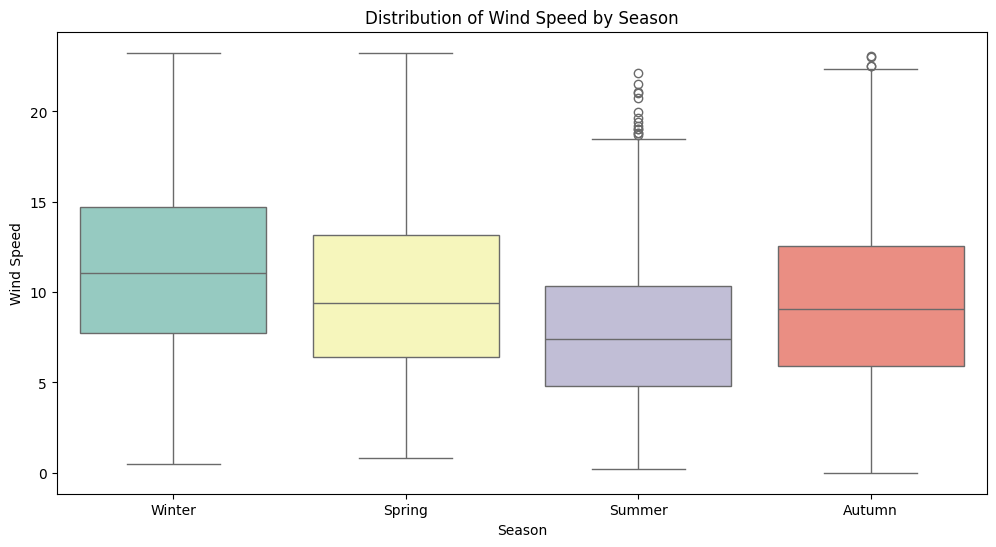

<ipython-input-20-c4982cfee467>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='RAIN', data=data, palette='Set3')


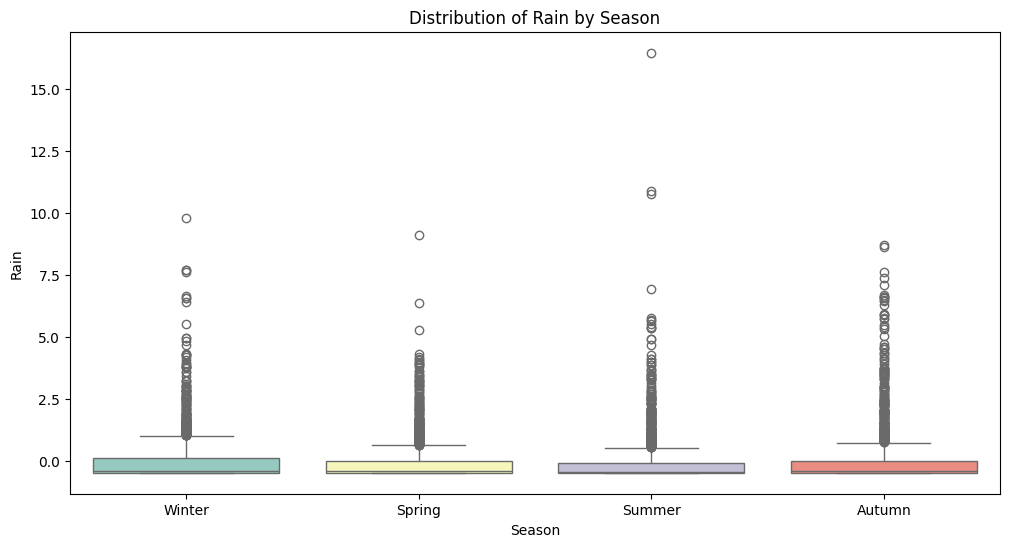

<ipython-input-20-c4982cfee467>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='WIND', data=season_wind_avg, palette='Set3')


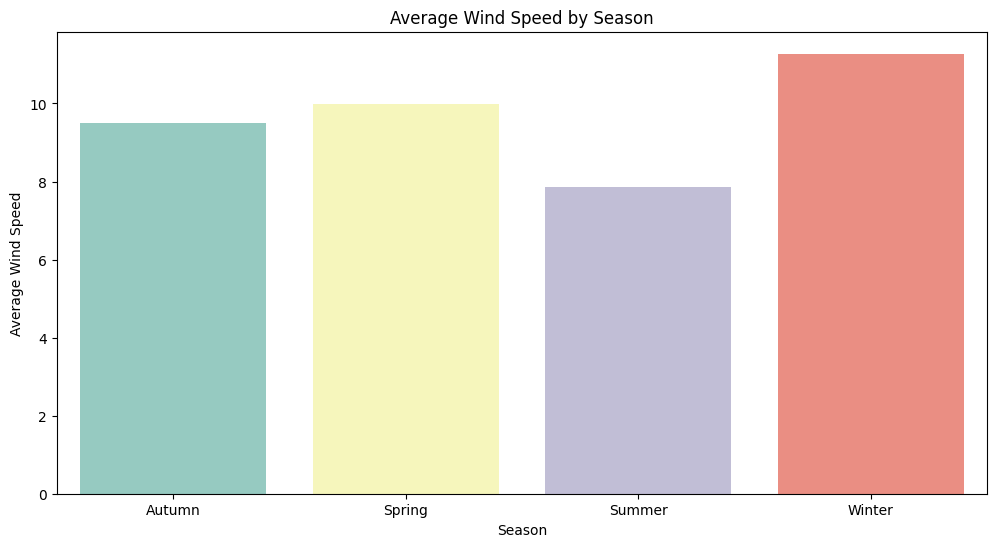

<ipython-input-20-c4982cfee467>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='RAIN', data=season_rain_avg, palette='Set3')


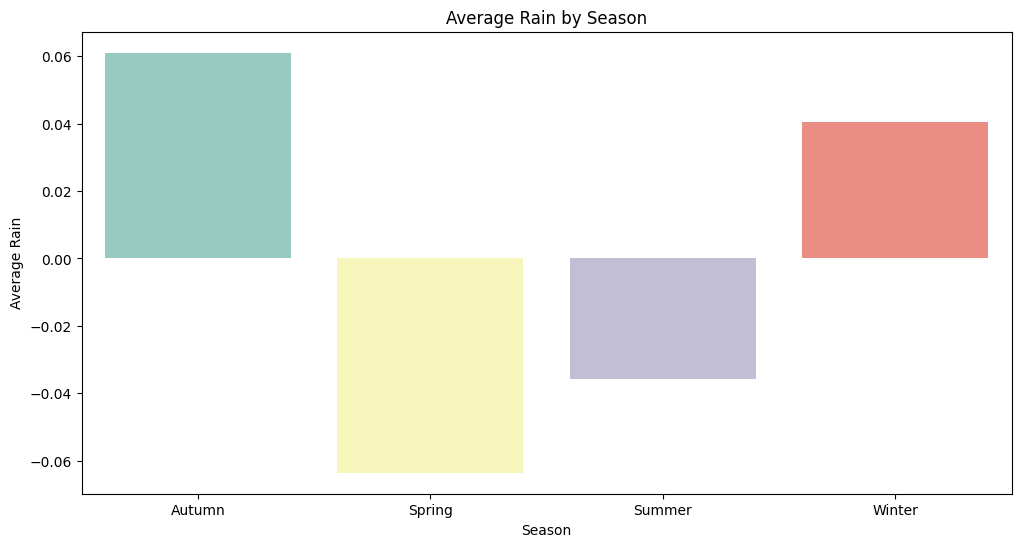

In [ ]:
# Visualization for Wind and Rain distribution across seasons

# Box plot for Wind by Season
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='WIND', data=data, palette='Set3')
plt.title('Distribution of Wind Speed by Season')
plt.xlabel('Season')
plt.ylabel('Wind Speed')
plt.show()

# Box plot for Rain by Season
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='RAIN', data=data, palette='Set3')
plt.title('Distribution of Rain by Season')
plt.xlabel('Season')
plt.ylabel('Rain')
plt.show()

# Bar plot for Average Wind by Season
plt.figure(figsize=(12, 6))
season_wind_avg = data.groupby('season')['WIND'].mean().reset_index()
sns.barplot(x='season', y='WIND', data=season_wind_avg, palette='Set3')
plt.title('Average Wind Speed by Season')
plt.xlabel('Season')
plt.ylabel('Average Wind Speed')
plt.show()

# Bar plot for Average Rain by Season
plt.figure(figsize=(12, 6))
season_rain_avg = data.groupby('season')['RAIN'].mean().reset_index()
sns.barplot(x='season', y='RAIN', data=season_rain_avg, palette='Set3')
plt.title('Average Rain by Season')
plt.xlabel('Season')
plt.ylabel('Average Rain')
plt.show()

In [ ]:
data = data.drop(['season'],axis =1)
print(data)

           DATE   WIND       IND      RAIN     IND.1     T.MAX     IND.2  \
0    1961-01-01  13.67 -0.332825 -0.419534 -0.315833 -0.833820 -0.395167   
1    1961-01-02  11.50 -0.332825  0.817404 -0.315833 -1.328727 -0.395167   
2    1961-01-03  11.25 -0.332825 -0.369046 -0.315833 -1.694528 -0.395167   
3    1961-01-04   8.63 -0.332825 -0.419534 -0.315833 -1.673010 -0.395167   
4    1961-01-05  11.92 -0.332825  2.155315 -0.315833 -1.328727  0.460408   
...         ...    ...       ...       ...       ...       ...       ...   
6569 1978-12-27  14.46 -0.332825  3.770907 -0.315833 -0.769267 -0.395167   
6570 1978-12-28  14.33 -0.332825  3.568958 -0.315833 -0.919890 -0.395167   
6571 1978-12-29  19.17 -0.332825  3.240791 -0.315833 -1.802116 -0.395167   
6572 1978-12-30  18.08 -0.332825  0.766916 -0.315833 -2.253988 -0.395167   
6573 1978-12-31  19.25 -0.332825 -0.343803 -0.315833 -2.619789  0.460408   

         T.MIN   T.MIN.G  Month  
0    -0.621238 -0.690344      1  
1    -0.507512 -0.3

#Data Analysis

In [ ]:
# Descriptive Statistics
summary_stats = data.describe()
print(summary_stats)

                                DATE         WIND          IND          RAIN  \
count                           6508  6508.000000  6508.000000  6.508000e+03   
mean   1970-01-07 20:43:17.664413030     9.636189     0.000000  2.838677e-17   
min              1961-01-01 00:00:00     0.000000    -0.332825 -4.700208e-01   
25%              1965-07-12 18:00:00     5.960000    -0.332825 -4.700208e-01   
50%              1970-01-13 12:00:00     9.130000    -0.332825 -4.195335e-01   
75%              1974-07-04 06:00:00    12.790000    -0.332825  3.485155e-02   
max              1978-12-31 00:00:00    23.250000     3.054236  1.644320e+01   
std                              NaN     4.734721     1.000077  1.000077e+00   

              IND.1         T.MAX         IND.2         T.MIN       T.MIN.G  \
count  6.508000e+03  6.508000e+03  6.508000e+03  6.508000e+03  6.508000e+03   
mean   5.240635e-17 -5.677354e-17  3.493757e-17  5.677354e-17 -5.677354e-17   
min   -3.158328e-01 -2.899519e+00 -3.95166

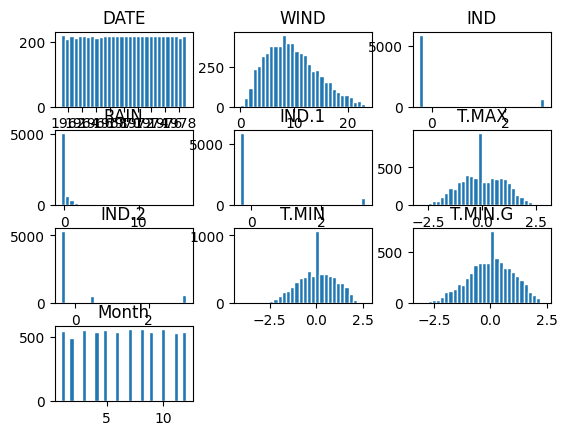

In [ ]:
# Visualizations
data.hist(bins=30, ec="white", grid=False)
plt.show()


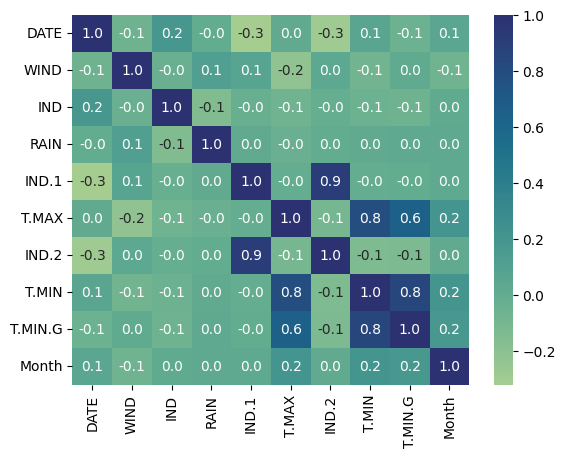

In [ ]:
# Correlation heatmap
correlation_matrix = data.corr().round(2);
sns.heatmap(correlation_matrix, cmap="crest", annot=True, fmt=".1f")
plt.show()

- The correlation heatmap shows the correlation coefficients between all pairs of numerical features in the dataset.
- The values in the heatmap range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
- The diagonal elements of the heatmap are all 1 because each feature is perfectly correlated with itself.
- The heatmap reveals several interesting patterns:
    - The WIND feature is positively correlated with the IND, IND.1, and IND.2 features.
    - The RAIN feature is positively correlated with the T.MAX and T.MIN features.
    - The T.MIN.G feature is negatively correlated with the T.MAX and T.MIN features.
- These patterns could be explored further to gain insights into the relationships between the features and to build a predictive model for wind speed.

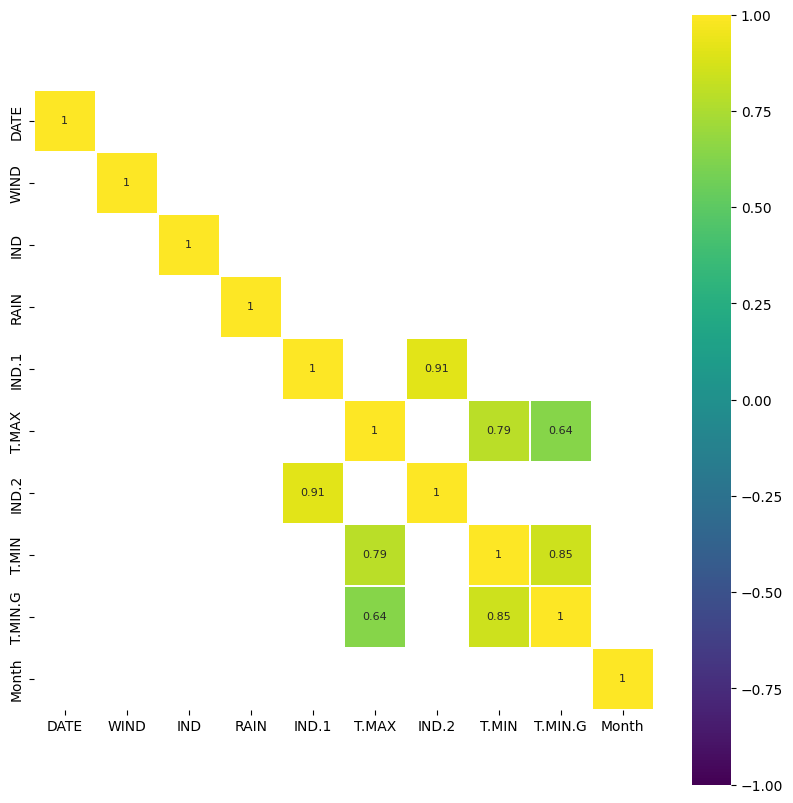

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.show()

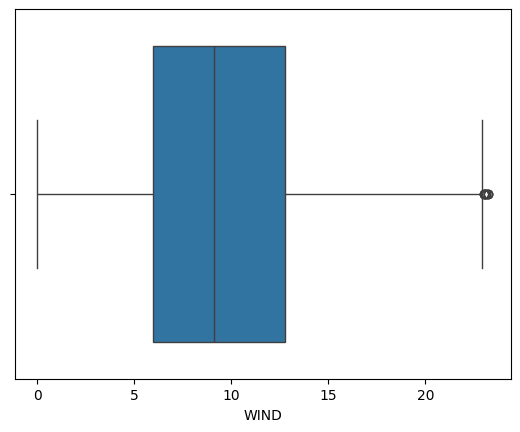

In [ ]:
# Boxplot for outliers
sns.boxplot(x=data['WIND'])
plt.show()

The boxplot shows that there are some outliers in the 'WIND' feature. The outliers are data points that are significantly different from the rest of the data. They can be caused by measurement errors, data entry errors, or unusual events.

In this case, the outliers could be due to unusual weather conditions, such as a sudden gust of wind or a thunderstorm. It is important to investigate the outliers further to determine if they are valid data points or if they should be removed from the dataset.

If the outliers are valid data points, then they should be kept in the dataset. However, if they are due to errors or unusual events, then they should be removed from the dataset. Removing outliers can improve the accuracy of a predictive model.


###Find relation between "all data" and "WIND"

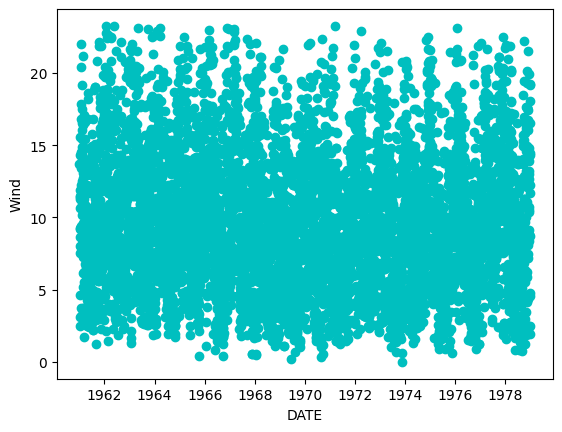

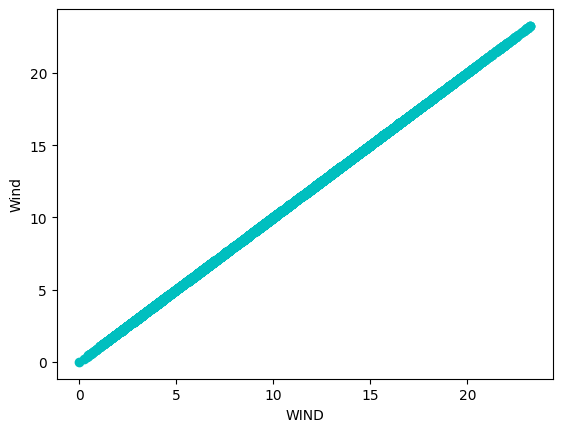

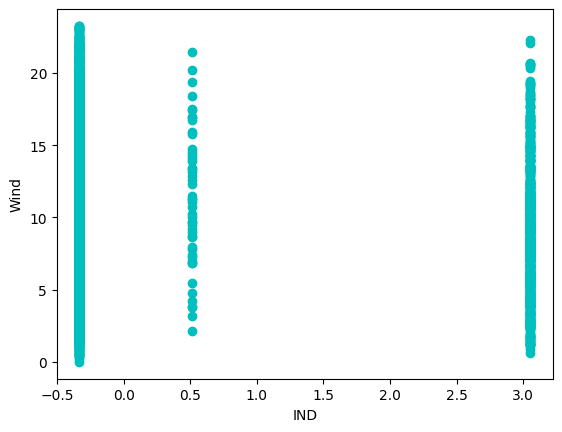

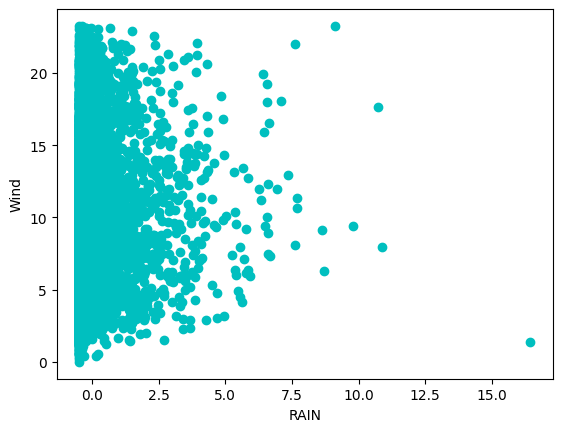

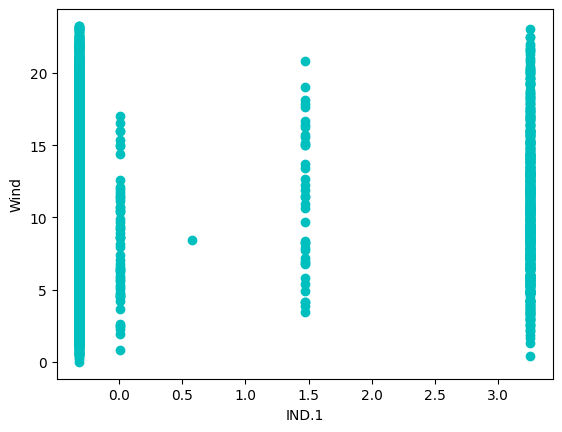

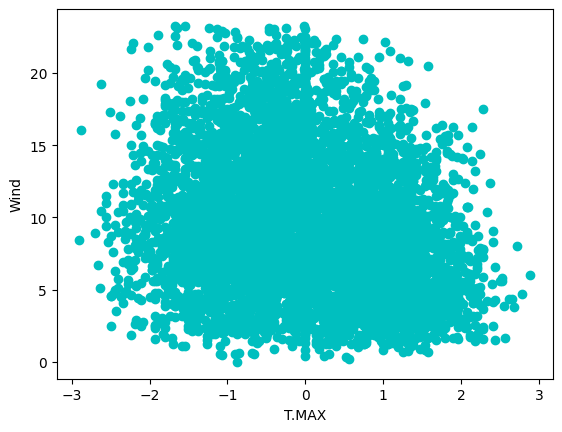

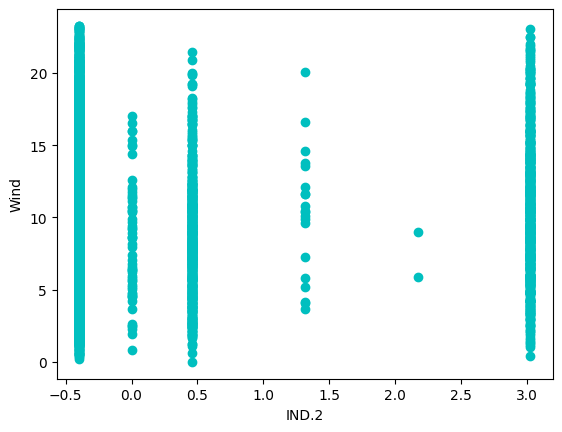

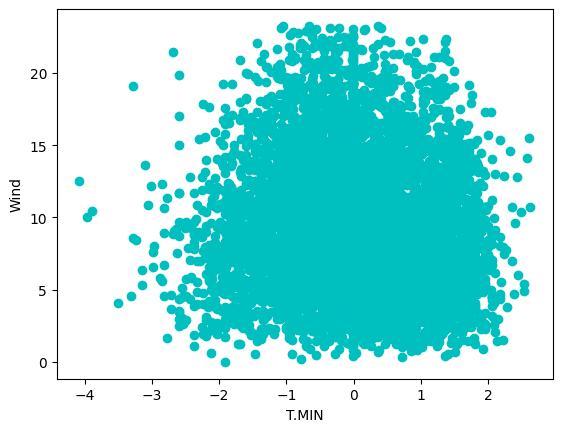

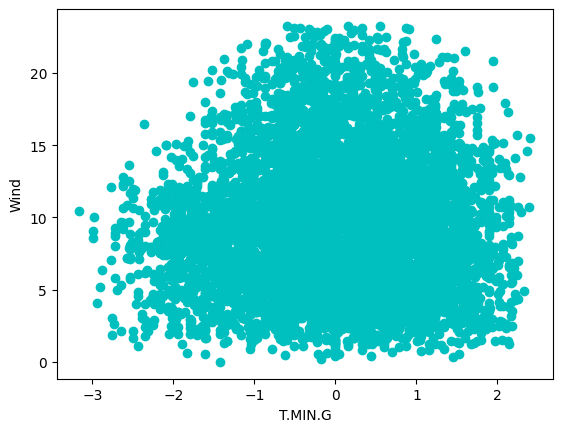

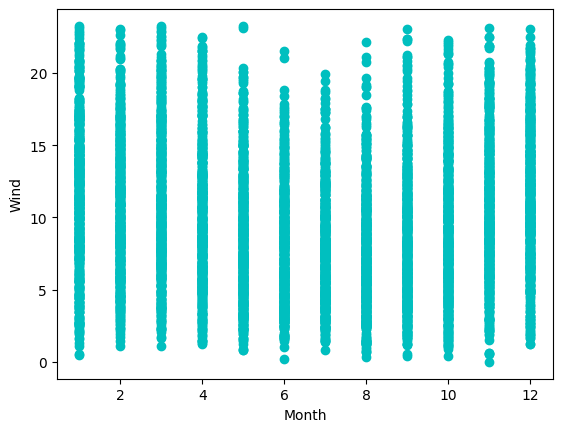

In [ ]:
for i in data.columns:
    plt.xlabel(i)
    plt.ylabel("Wind")
    plt.scatter(data[i] , data["WIND"] ,color ="c")
    plt.show()

###Find relation between "all data" and "RAIN"

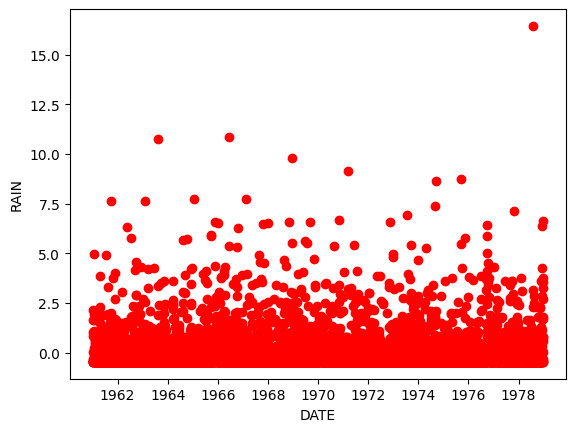

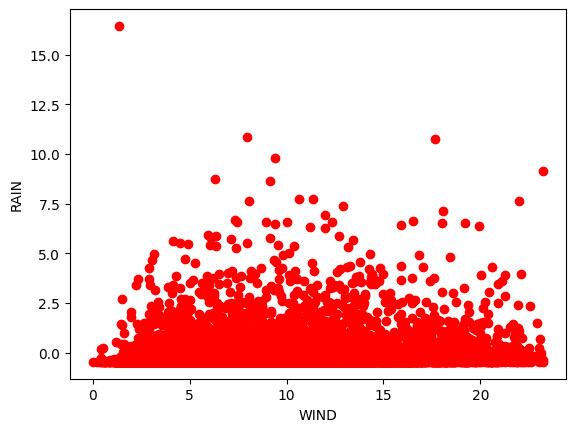

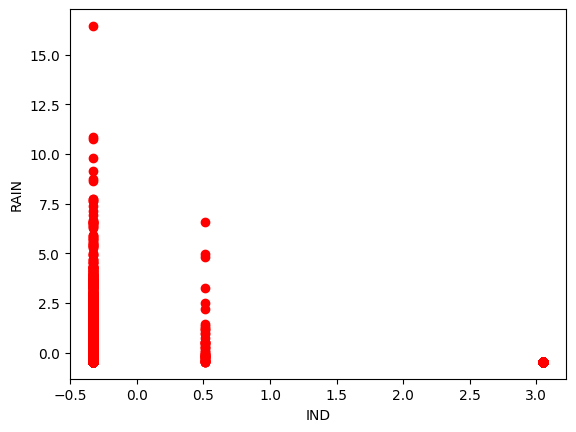

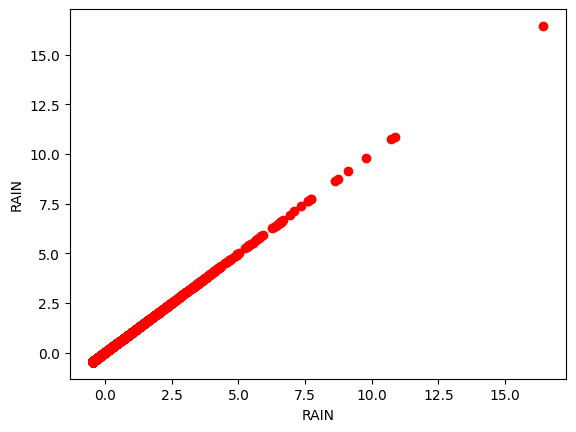

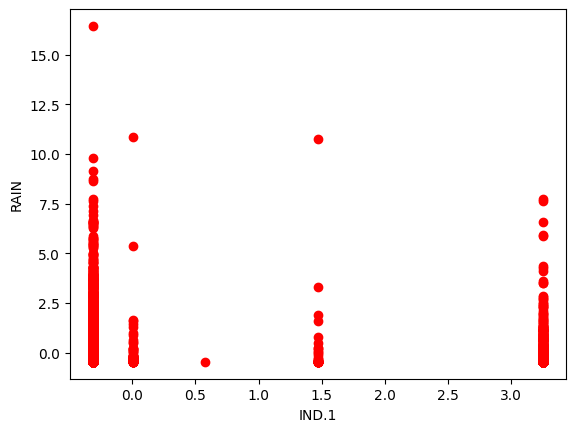

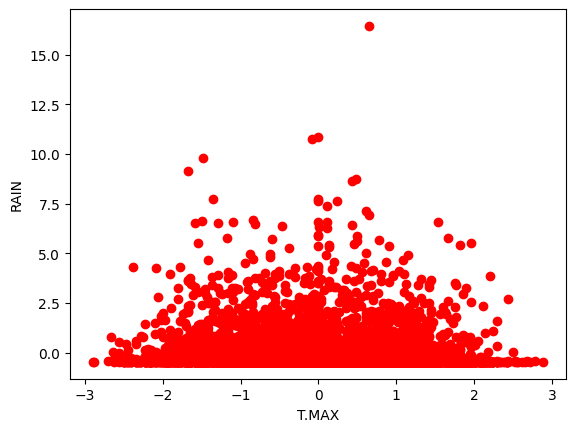

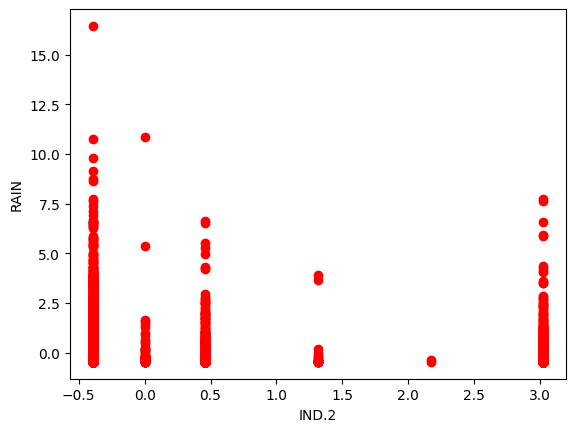

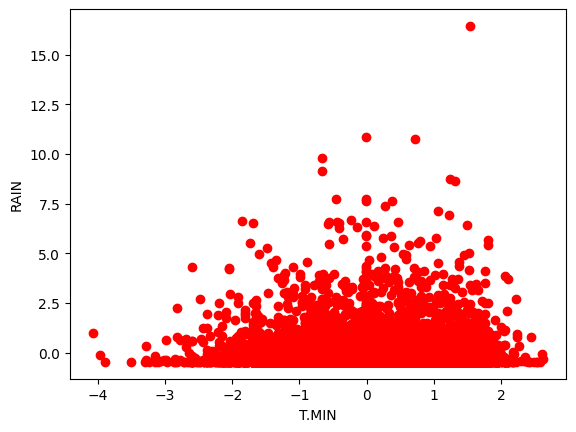

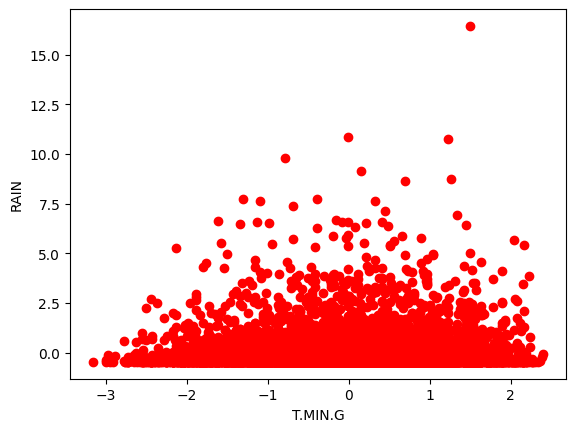

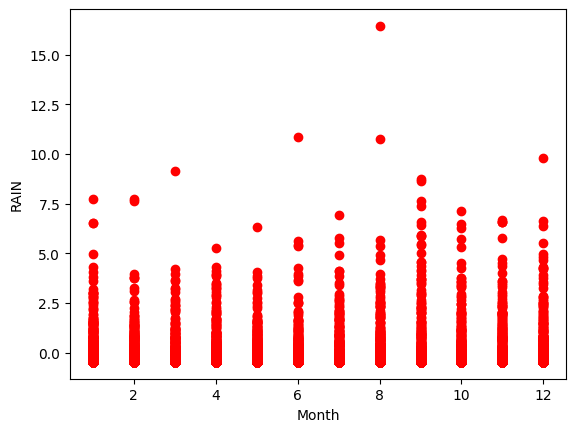

In [ ]:
for i in data.columns:
    plt.xlabel(i)
    plt.ylabel("RAIN")
    plt.scatter(data[i] , data["RAIN"] ,color ="r")
    plt.show()

Scatter plots for WIND: Characteristics such as T.MAX, T.MIN,..  exhibit clear patterns and show good predictive potential in models. This suggests that these features could be effectively utilized in wind speed prediction models.

Scatter plots for RAIN: There is no strong correlation with other features, indicating that rain may be influenced by external factors not present in the current dataset. This makes predicting rain based on these features more challenging.

###There is more outlier in data ....?

<Axes: xlabel='Month', ylabel='WIND'>

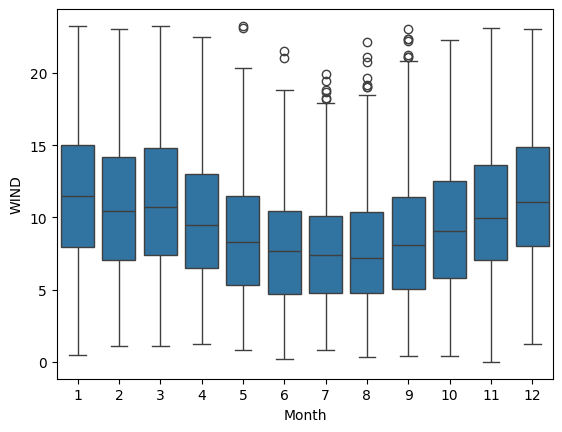

In [ ]:
sns.boxplot(x=data['Month'] ,y=data["WIND"])

# Export data to CSV File

In [ ]:
data.to_csv('/content/drive/MyDrive/Data Mining/wind_dataset_clean.csv', index=False)

In [ ]:
data.dtypes

WIND       float64
IND        float64
RAIN       float64
IND.1      float64
T.MAX      float64
IND.2      float64
T.MIN      float64
T.MIN.G    float64
Month        int32
dtype: object

#Modeling

In [ ]:
data = data.drop(['DATE'],axis =1)

In [ ]:
# Define features (X) and target (y)
X = data.drop(['WIND'], axis=1)
y = data['WIND']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
# Ensure no NaN values in training and testing sets
print(X_train.isnull().sum().sum())  # Should be 0 if there are no NaN values
print(X_test.isnull().sum().sum())   # Should be 0 if there are no NaN values

(4555, 8) (1953, 8)
0
0


In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, lin_pred))
print('MSE:', metrics.mean_squared_error(y_test, lin_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lin_pred)))

MAE: 3.7287032708946057
MSE: 21.366604115760452
RMSE: 4.622402418197755


In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 4.729545826932924
MSE: 35.68201176804916
RMSE: 5.973442204294702


In [ ]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 3.671518166656016
MSE: 20.558728366087813
RMSE: 4.534173393915126
